In [57]:
import random
import numpy as np
from matplotlib import pyplot as plt
import math
from jobclass import *
import seaborn as sns
from main import *

num_of_server = 6
lamda = 3.1
alpha2l=0.91
alpha2u=1.27
servers={"p1":0.32,"p2":0.21,"p3":0.15,"p4":0.08,"p5":0.24}

In [58]:
%matplotlib inline
sns.set_style('darkgrid')

alpha = 0.4
beta = 4.5


number of jobs is 713


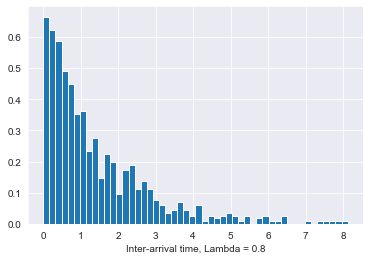

mean arrival time is:1.3993019096744173


In [59]:
%matplotlib inline
sns.set_style('darkgrid')

inter_arrival_time_list = []
#arrival_time_list = []
time_end = 1000
seed = 1
alpha2l=0.91
alpha2u=1.27
random.seed(seed)

nb_of_jobs = 0
alpha = 0.4
beta = 4.5
Lambda = 0.8
cumulative_T = 0.0
while cumulative_T < time_end:
    random_arrival = random.expovariate(Lambda)*random.uniform(alpha2l,alpha2u)
    if random_arrival == 0:   
        continue
    cumulative_T += random_arrival
    if cumulative_T > time_end:
        break
    inter_arrival_time_list.append(random_arrival)
    #arrival_time_list.append(cumulative_T)
    nb_of_jobs += 1
server_T = np.random.uniform(0,1,len(inter_arrival_time_list))
print(f'number of jobs is {nb_of_jobs}')
plt.hist(inter_arrival_time_list, bins=50,density=True)
plt.xlabel('Inter-arrival time, Lambda = 0.8')
plt.show()
mean_arrival_time = sum(inter_arrival_time_list[:nb_of_jobs])/nb_of_jobs
print(f"mean arrival time is:{mean_arrival_time}")


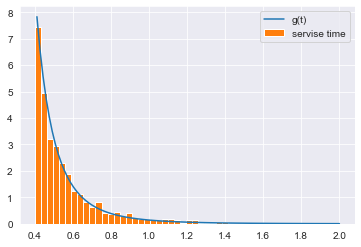

In [60]:
randomservisetime = []
for  i in range(1500):
    randomservisetime.append(get_server_time(alpha, beta))
def g(t):
    gama = (beta - 1) / (alpha ** (1 - beta))
    return gama/(t**(beta))
x = np.linspace(alpha+0.01, 2, 100)
y = g(x)
plt.plot(x, y,label='g(t)')
plt.hist(randomservisetime, bins=50, density=True,label='servise time')
plt.legend()
plt.show()


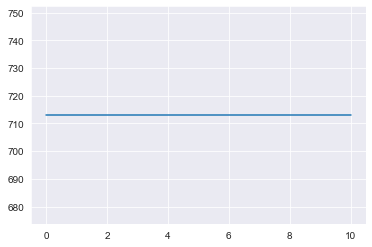

In [61]:
def tentimes(cumulative_T,seed):
    random.seed(seed)
    nb_of_jobs = 0
    while cumulative_T < time_end:
        random_arrival = random.expovariate(Lambda)*random.uniform(alpha2l,alpha2u)
        if random_arrival == 0:   
            continue
        cumulative_T += random_arrival
        if cumulative_T > time_end:
            break
        inter_arrival_time_list.append(random_arrival)
        #arrival_time_list.append(cumulative_T)
        nb_of_jobs += 1
    return nb_of_jobs
list = []
cumulative_T = 0.0
for i in range(10):
    list.append(tentimes(cumulative_T,seed))
    cumulative_T = 0.0
x = np.linspace(0, 10, 10)
y = list
plt.plot(x, y,label='tentimes')

In [68]:

def serviceTimeSampling(alpha, beta):
    gama = (beta - 1) / (alpha ** (1 - beta))
    while True:
        x = random.uniform(alpha, 2)
        y = random.uniform(0, gama / (alpha ** beta) + 1)
        if y <= gama / (x ** beta):
            return x

def randomsimulator(Lambda, alpha2l, alpha2u, p, et, alpha, beta):
    
    cumulative_T = .0
    arrival = []

    while cumulative_T < et:
        Arrival = random.expovariate(Lambda) * (random.uniform(alpha2l, alpha2u))
        arrival.append(Arrival)
        cumulative_T += Arrival
    cumulative_P = np.cumsum(p)
    n = len(arrival)
    server_T = np.random.uniform(0, 1, n)
    for i in range(p.size - 1):
        server_T[(cumulative_P[i] <
                          server_T) & (server_T <= cumulative_P[i + 1])] = i + 2.
    server_T[(server_T <= cumulative_P[0])] = 1.0
    service = np.zeros((len(arrival), int(server_T.max())))
    service[service == 0] = np.nan

    for x, visit in enumerate(server_T):
        for y in range(int(visit)):
            service[x][y] = serviceTimeSampling(alpha, beta)

    return arrival, service
beta, alpha = 3.4, 0.3
n, end_time = 6, 1000.0
p = np.array([0.32, 0.21, 0.15, 0.08, 0.24])
Lambda, alpha2l, alpha2u = 3.1, 0.91, 1.27


[1.4045156420748357, 1.4108086772712896, 1.4159661177566458, 1.4204246974373578, 1.4007954787758388, 1.4007954787758388]


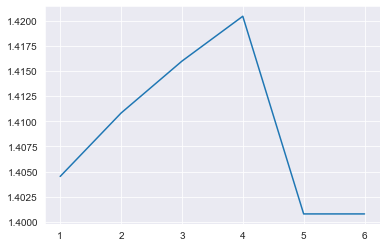

In [69]:
def loadvalue(Job_list, s,dispatcher):

    dispatcher.simulate(Job_list, s)
    response = []
    for i in Job_list:
        response.append(i.responseTime)
    mrt = np.array(response).mean()
    
    return mrt
mrt = []
interArrival, service = randomsimulator(Lambda, alpha2l, alpha2u, p, end_time, alpha, beta)
for h in range(1, n+1):
    allJob = []
    nextArrival = 0.0
    for i, interval in enumerate(interArrival):
        nextArrival += interval
        idx = i + 1
        totalVisitTime = (~np.isnan(service[i])).sum()
        serviceTime = service[i]
        allJob.append(Job(index=idx, arrivalTime=nextArrival, serviceTime=serviceTime, totalVisitTime=totalVisitTime))

    dispatcher = Dispatcher(h, n)
    mrt.append(loadvalue(allJob,11,dispatcher))
print(mrt)
plt.plot([i for i in range(1,n+1)],mrt)